<a href="https://colab.research.google.com/github/saqibkaka/PRODIGY_DS_TASK/blob/main/PRODIGY_DS_TASK_02/EDA_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# General infos about our data

In [12]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# **Data clean**

In [16]:

# Handling missing values:
# Filling missing Ages with the median Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Dropping unnecessary columns (for this example, we're dropping 'embarked' and 'deck')
df.drop(['Embarked', 'SibSp'], axis=1, inplace=True)

# Display the first few rows after cleaning
print("\nFirst Few Rows after Cleaning:")
print(df.head())


First Few Rows after Cleaning:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  Parch  \
0                            Braund, Mr. Owen Harris    male  22.0      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      0   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      0   
4                           Allen, Mr. William Henry    male  35.0      0   

             Ticket     Fare Cabin  
0         A/5 21171   7.2500   NaN  
1          PC 17599  71.2833   C85  
2  STON/O2. 3101282   7.9250   NaN  
3            113803  53.1000  C123  
4            373450   8.0500   NaN  


<ipython-input-16-db530bb32a2c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


# Categorical Variable Analysis

In [17]:
def barplot(variable):
    """
    ınput : variable
    output : bar plot variable/value/feature
    """
    # get variable
    var = df[variable]
    # get count of categorical variable
    countvar = var.value_counts()
    # visualization
    plt.figure(figsize = (9,3))
    plt.bar(countvar.index,countvar.values)
    plt.xticks(countvar.index,countvar.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    #print infos

    plt.show()

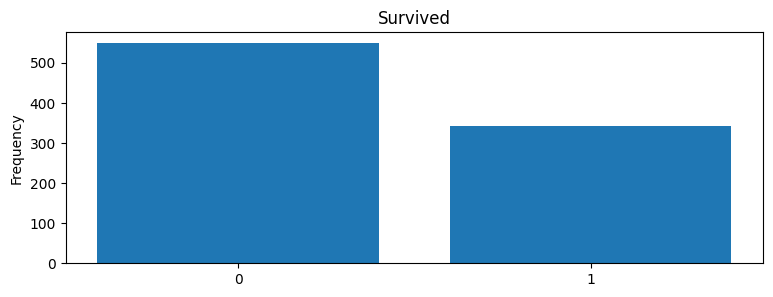

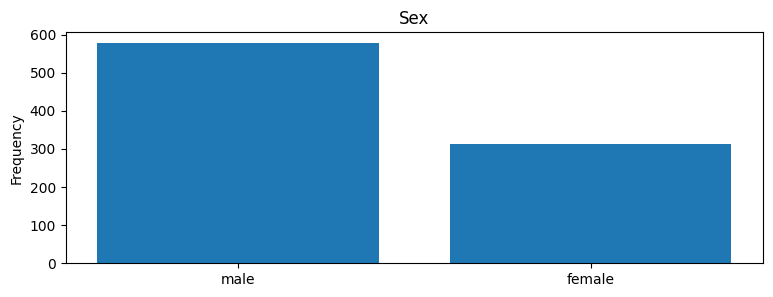

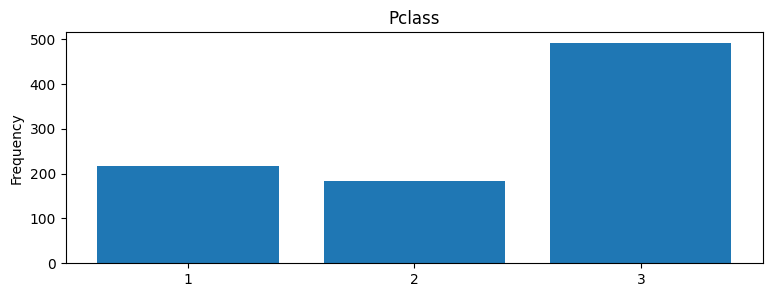

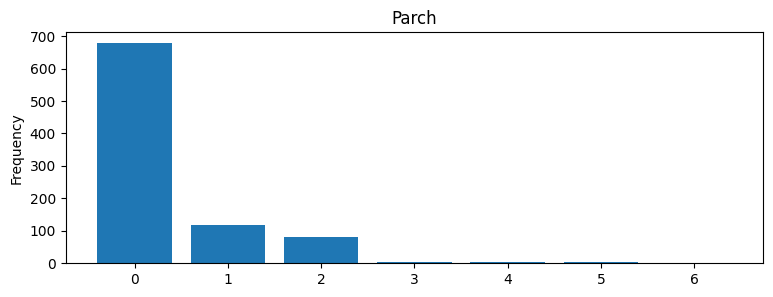

In [18]:
categorical = ["Survived", "Sex", "Pclass", "Parch"]
for variable in categorical:
    barplot(variable)

In [19]:
category2 = ["Ticket","Name","Cabin"]
for category in category2:
    print(df[category].value_counts())
    print("*******************************")

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
*******************************
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
*******************************
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148      

# Numerical Variable Analysis

In [20]:
def hist_plot(variable):
    # get variable
    var = df[variable]
    #visualize
    plt.figure(figsize = (9,3))
    plt.hist(var,bins =50)
    plt.ylabel("Frequency")
    plt.title(variable + " Distrubition with Histogram")
    plt.show()


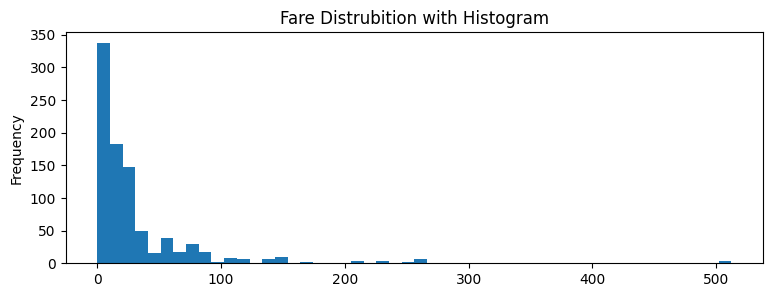

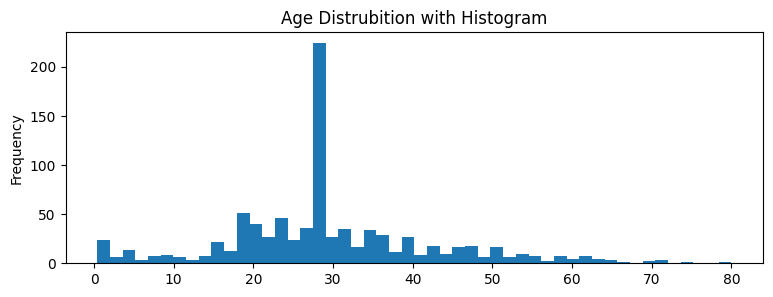

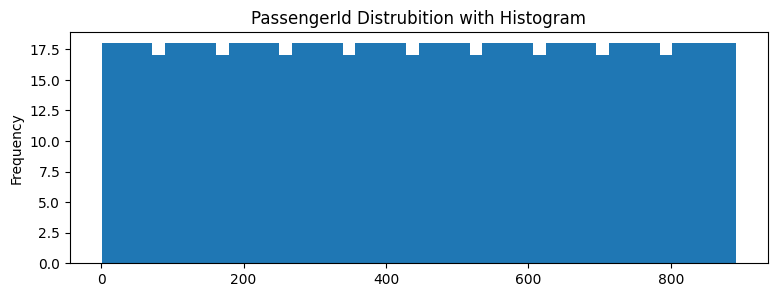

In [21]:
numerical = ["Fare","Age","PassengerId"]
for variable in numerical:
    hist_plot(variable)

# Age distribution

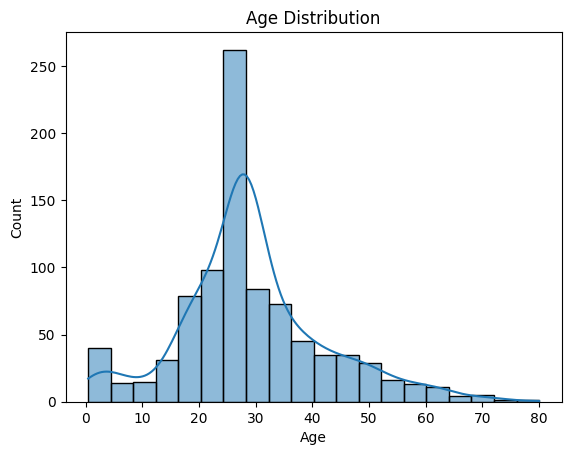

In [22]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation between  Parch , Age , Fare , Survived

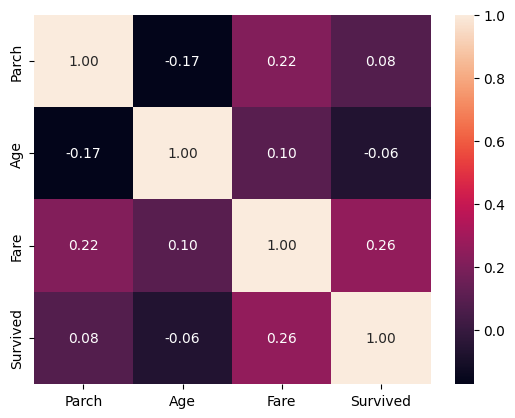

In [23]:
data = df.loc[:,[  "Parch" , "Age" , "Fare" , "Survived"]]
sns.heatmap(data.corr(),fmt = ".2f",annot = True)
plt.show()